In [7]:
# using N-grams feature for capture contextual information from reviews...

import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re



# DATASET
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'


df = pd.read_csv(file_path)

# DROP ANY MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URL
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHERECTER
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))



# SENTIMENT ANALYSE USING VADER
sia = SentimentIntensityAnalyzer()


# BUILD FUNCTION TO GENERATE N GRAMS
def generate_ngrams(text, n):
    tokenized_text = word_tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    return [' '.join(grams) for grams in ngrams_list]

# N-GRAMS AS A NEW COLUMN
df['ngrams'] = df['reviewText'].apply(lambda x: generate_ngrams(x, n=2))  # Change n as desired (e.g., n=2 for bigrams)


# SENTIMENT ANALYSIS ON N-GRAMS
for index, row in df.iterrows():
    if index < 5:
        review = row['reviewText']
        ngrams_list = row['ngrams']
        sentiment_scores = sia.polarity_scores(review)
        
        print("Review Text:", review)
        print("Sentiment Score:", sentiment_scores['compound'])
        print("N-grams:", ngrams_list)
        print()
    else:
        break


Review Text: purchas devic work advertis never much phone memori sinc download lot stuff brainer
Sentiment Score: 0.0
N-grams: ['purchas devic', 'devic work', 'work advertis', 'advertis never', 'never much', 'much phone', 'phone memori', 'memori sinc', 'sinc download', 'download lot', 'lot stuff', 'stuff brainer']

Review Text: work expect sprung higher capac think made bit cheesier earlier version paint look clean
Sentiment Score: 0.4019
N-grams: ['work expect', 'expect sprung', 'sprung higher', 'higher capac', 'capac think', 'think made', 'made bit', 'bit cheesier', 'cheesier earlier', 'earlier version', 'version paint', 'paint look', 'look clean']

Review Text: think work greathad diff bran 64gb card went south 3 monthsthi one held pretti well sinc s3 note3 updat 32114ive month zero issu sinc transfer s3 note3 note2 card reliabl solidch
Sentiment Score: 0.2732
N-grams: ['think work', 'work greathad', 'greathad diff', 'diff bran', 'bran 64gb', '64gb card', 'card went', 'went south', 

Sentiment Score: 0.0
N-grams: ['purchas devic', 'devic work', 'work advertis', 'advertis never', 'never much', 'much phone', 'phone memori', 'memori sinc', 'sinc download', 'download lot', 'lot stuff', 'stuff brainer']

Sentiment Score: 0.4019
N-grams: ['work expect', 'expect sprung', 'sprung higher', 'higher capac', 'capac think', 'think made', 'made bit', 'bit cheesier', 'cheesier earlier', 'earlier version', 'version paint', 'paint look', 'look clean']

Sentiment Score: 0.2732
N-grams: ['think work', 'work greathad', 'greathad diff', 'diff bran', 'bran 64gb', '64gb card', 'card went', 'went south', 'south 3', '3 monthsthi', 'monthsthi one', 'one held', 'held pretti', 'pretti well', 'well sinc', 'sinc s3', 's3 note3', 'note3 updat', 'updat 32114ive', '32114ive month', 'month zero', 'zero issu', 'issu sinc', 'sinc transfer', 'transfer s3', 's3 note3', 'note3 note2', 'note2 card', 'card reliabl', 'reliabl solidch']

Sentiment Score: 0.8591
N-grams: ['bought retail', 'retail packag', 'p

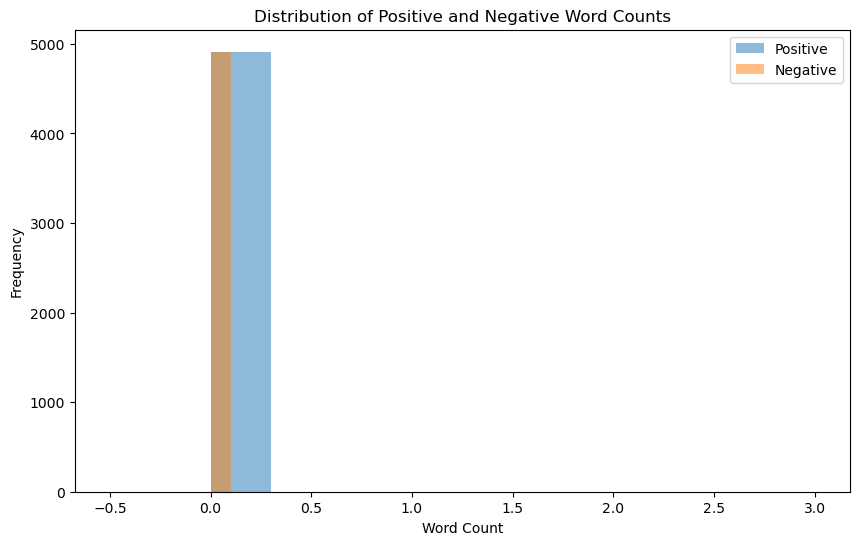

In [8]:

# perform positive and negative word count in each review using sentiment lexicons

import pandas as pd


import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# DATASET
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'

df = pd.read_csv(file_path)

# DROP ANY MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URL
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHARACTERS
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# SENTIMENT ANALYSIS USING VADER
sia = SentimentIntensityAnalyzer()

# build function to generate N GRAMS
def generate_ngrams(text, n):
    tokenized_text = word_tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    return [' '.join(grams) for grams in ngrams_list]

# ADD N-GRAMS AS A NEW COLUMN
df['ngrams'] = df['reviewText'].apply(lambda x: generate_ngrams(x, n=2))  # Change n as desired (e.g., n=2 for bigrams)

# SENTIMENT ANALYSIS ON N-GRAMS
positive_count = []
negative_count = []

for index, row in df.iterrows():
    review = row['reviewText']
    ngrams_list = row['ngrams']
    sentiment_scores = sia.polarity_scores(review)
    
    if index < 5:
        positive_count.append(sum([1 for word in review.split() if word in sia.lexicon and sia.lexicon[word] > 0]))
        negative_count.append(sum([1 for word in review.split() if word in sia.lexicon and sia.lexicon[word] < 0]))
        
        print("Sentiment Score:", sentiment_scores['compound'])
        print("N-grams:", ngrams_list)
        print()
        
    else:
        positive_count.append(0)
        negative_count.append(0)

# POSITIVE AND NEGATIVE WORD COUNT
df['Positive Word Count'] = positive_count
df['Negative Word Count'] = negative_count


print(df.head(5))

#  POSSITIVE AND NEGATIVE  WORD COUNT 
df['Positive Word Count'] = positive_count
df['Negative Word Count'] = negative_count



plt.figure(figsize=(10, 6))
plt.hist(df['Positive Word Count'], bins=10, alpha=0.5, label='Positive')
plt.hist(df['Negative Word Count'], bins=10, alpha=0.5, label='Negative')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Word Counts')
plt.legend()
plt.show()
